### Importación de datos



In [45]:
import pandas as pd

import matplotlib.pyplot as plt



url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [46]:
#listas de dataframes y nombres
tiendas = [tienda, tienda2, tienda3, tienda4]
nombres = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]

In [6]:
#calcula los ingresos de cada tienda
ingresos = [df["Precio"].sum() for df in tiendas]


In [9]:
#muestra los resultados
for nombre, ingreso in zip(nombres, ingresos):
  print(f"El Ingreso total de la {nombre} fue de = ${ingreso:,.2f}")


El Ingreso total de la Tienda 1 fue de = $1,150,880,400.00
El Ingreso total de la Tienda 2 fue de = $1,116,343,500.00
El Ingreso total de la Tienda 3 fue de = $1,098,019,600.00
El Ingreso total de la Tienda 4 fue de = $1,038,375,700.00


# 2. Ventas por categoría

In [10]:
#calcula y muestra la cantidad de productos vendidos por categoría
for df, nombre in zip(tiendas, nombres):
  print(f"\n📊 {nombre} - Productos vendidos por categoría:")
  conteo = df["Categoría del Producto"].value_counts()
  print(conteo)



📊 Tienda 1 - Productos vendidos por categoría:
Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
Name: count, dtype: int64

📊 Tienda 2 - Productos vendidos por categoría:
Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
Name: count, dtype: int64

📊 Tienda 3 - Productos vendidos por categoría:
Categoría del Producto
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Libros                     185
Instrumentos musicales     177
Artículos para el hoga

In [12]:
# Calcula y muestra la cantidad de productos vendidos por categoría y los ingresos por categoría
for df, nombre in zip(tiendas, nombres):
    print(f"\n📊 {nombre} - Productos vendidos por categoría:")
    conteo = df["Categoría del Producto"].value_counts()
    print(conteo)

    print(f"\n {nombre} - Facturación por categoría:")
    facturacion = df.groupby("Categoría del Producto")["Precio"].sum().sort_values(ascending=False)
    print(facturacion)




📊 Tienda 1 - Productos vendidos por categoría:
Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
Name: count, dtype: int64

 Tienda 1 - Facturación por categoría:
Categoría del Producto
Electrónicos               429493500.0
Electrodomésticos          363685200.0
Muebles                    187633700.0
Instrumentos musicales      91299000.0
Deportes y diversión        39290000.0
Juguetes                    17995700.0
Artículos para el hogar     12698400.0
Libros                       8784900.0
Name: Precio, dtype: float64

📊 Tienda 2 - Productos vendidos por categoría:
Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales   

# 3. Calificación promedio de la tienda


In [14]:
#calcula y muestra la calificación promedio por cada tienda
for df, nombre in zip(tiendas, nombres):
    # Columna H = índice 7
    calificacion_promedio = df.iloc[:, 7].mean()
    print(f"La Calificación promedio de la {nombre} es = {calificacion_promedio:.2f}")


La Calificación promedio de la Tienda 1 es = 3.98
La Calificación promedio de la Tienda 2 es = 4.04
La Calificación promedio de la Tienda 3 es = 4.05
La Calificación promedio de la Tienda 4 es = 4.00


# 4. Productos más y menos vendidos

In [24]:
#listas de dataframes y nombres
tiendas = [tienda, tienda2, tienda3, tienda4]
nombres = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]

In [17]:
#datos para crear los gráficos de los productos más y menos vendidos por cada tienda
for df, nombre in zip(tiendas, nombres):
    conteo_productos = df["Producto"].value_counts()
    #guarda los top 5 de productos mas vendidos
    top_5 = conteo_productos.head(5)
    bottom_5 = conteo_productos.tail(5)
    #muestra los 5 productos mas vendidos
    print(f"\n📈 {nombre} - Productos más vendidos:")
    print(top_5)
    #muestra los 5 productos menos vendidos
    print(f"\n📉 {nombre} - Productos menos vendidos:")
    print(bottom_5)



📈 Tienda 1 - Productos más vendidos:
Producto
Microondas          60
TV LED UHD 4K       60
Armario             60
Secadora de ropa    58
Mesa de noche       56
Name: count, dtype: int64

📉 Tienda 1 - Productos menos vendidos:
Producto
Ciencia de datos con Python    39
Pandereta                      36
Olla de presión                35
Auriculares con micrófono      33
Celular ABXY                   33
Name: count, dtype: int64

📈 Tienda 2 - Productos más vendidos:
Producto
Iniciando en programación    65
Microondas                   62
Batería                      61
Guitarra acústica            58
Pandereta                    58
Name: count, dtype: int64

📉 Tienda 2 - Productos menos vendidos:
Producto
Auriculares        37
Sillón             35
Mesa de comedor    34
Impresora          34
Juego de mesa      32
Name: count, dtype: int64

📈 Tienda 3 - Productos más vendidos:
Producto
Kit de bancas      57
Mesa de comedor    56
Cama king          56
Set de ollas       55
Mesa de noche 

# 5. Envío promedio por tienda

In [29]:
#calcula y muestra el costo de envío promedio por tienda
for df, nombre in zip(tiendas, nombres):
    costo_promedio = df["Costo de envío"].mean()
    print(f"El costo de envío promedio de la {nombre} es = ${costo_promedio:,.2f}")

El costo de envío promedio de la Tienda 1 es = $26,018.61
El costo de envío promedio de la Tienda 2 es = $25,216.24
El costo de envío promedio de la Tienda 3 es = $24,805.68
El costo de envío promedio de la Tienda 4 es = $23,459.46


# 6. Generación de gráficos para los ítems 1 al 5

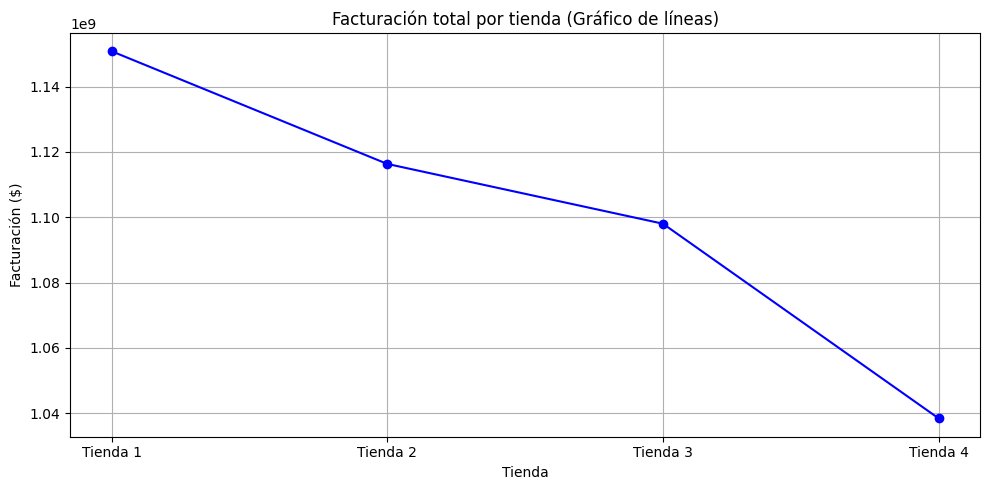

In [33]:
#corresponde al gráfico para mostrar la facturación total por cada tienda:
#calcula la facturación total por cada tienda
facturacion = [df["Precio"].sum() for df in tiendas]

#gráfico de líneas que muestra la facturación total por cada tienda
plt.figure(figsize=(10, 5))
plt.plot(nombres, facturacion, marker='o', linestyle='-', color='blue')
plt.title("Facturación total por tienda (Gráfico de líneas)")
plt.xlabel("Tienda")
plt.ylabel("Facturación ($)")
plt.grid(True)
plt.tight_layout()
plt.show()



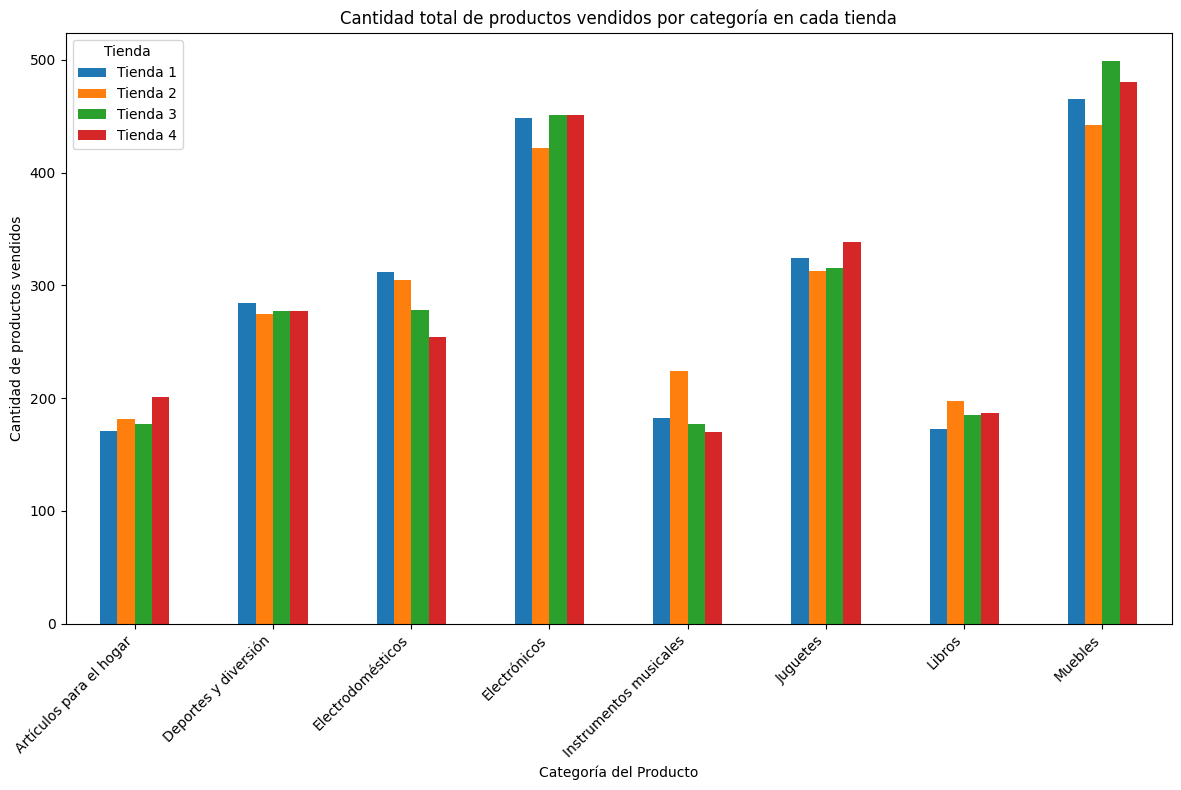

In [35]:
#corresponde al gráfico para mostrar la cantidad total de productos vendidos por categoría en cada tienda
#calcula la cantidad total de productos vendidos por categoría en cada tienda
categorias_tienda1 = tienda["Categoría del Producto"].value_counts()
categorias_tienda2 = tienda2["Categoría del Producto"].value_counts()
categorias_tienda3 = tienda3["Categoría del Producto"].value_counts()
categorias_tienda4 = tienda4["Categoría del Producto"].value_counts()

#crea un DataFrame con los resultados
df_categorias = pd.DataFrame({
    "Tienda 1": categorias_tienda1,
    "Tienda 2": categorias_tienda2,
    "Tienda 3": categorias_tienda3,
    "Tienda 4": categorias_tienda4
}).fillna(0)


#crea el gráfico de barras agrupadas por categoria en cada tienda
df_categorias.plot(kind="bar", figsize=(12, 8))
plt.title("Cantidad total de productos vendidos por categoría en cada tienda")
plt.xlabel("Categoría del Producto")
plt.ylabel("Cantidad de productos vendidos")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Tienda")
plt.tight_layout()
plt.show()



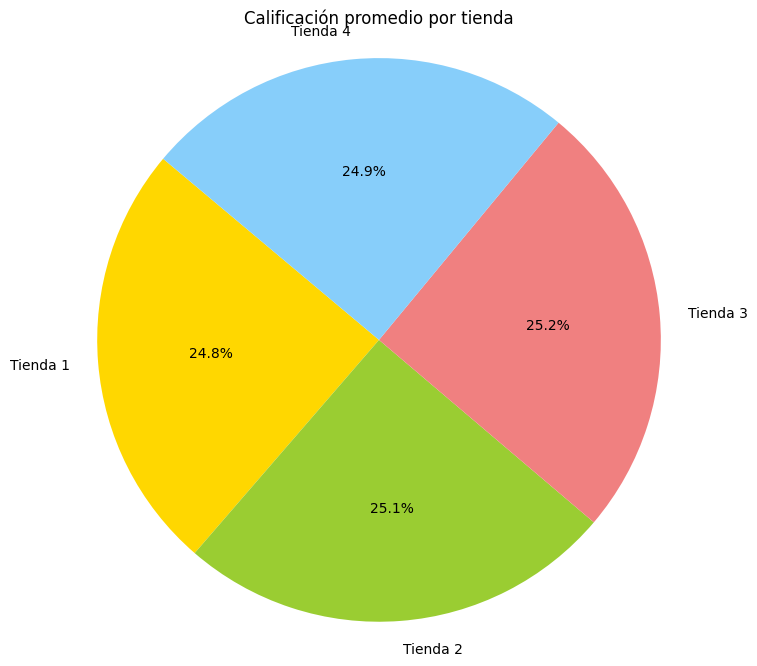

In [66]:
#corresponde al gráfico para mostrar la calificación promedio de cada tienda:

#calcula la calificación promedio por tienda
#calificaciones_promedio = [df.iloc[:, 7].mean() for df in tiendas]
for df, nombre in zip(tiendas, nombres):
    # Columna H = índice 7
    calificacion_promedio = df.iloc[:, 7].mean()
#crea el gráfico de torta (pie chart)
plt.figure(figsize=(8, 8))
plt.pie(calificaciones_promedio, labels=nombres, autopct='%1.1f%%', startangle=140,
        colors=['gold', 'yellowgreen', 'lightcoral', 'lightskyblue'])
plt.title("Calificación promedio por tienda")
plt.axis('equal')
plt.show()


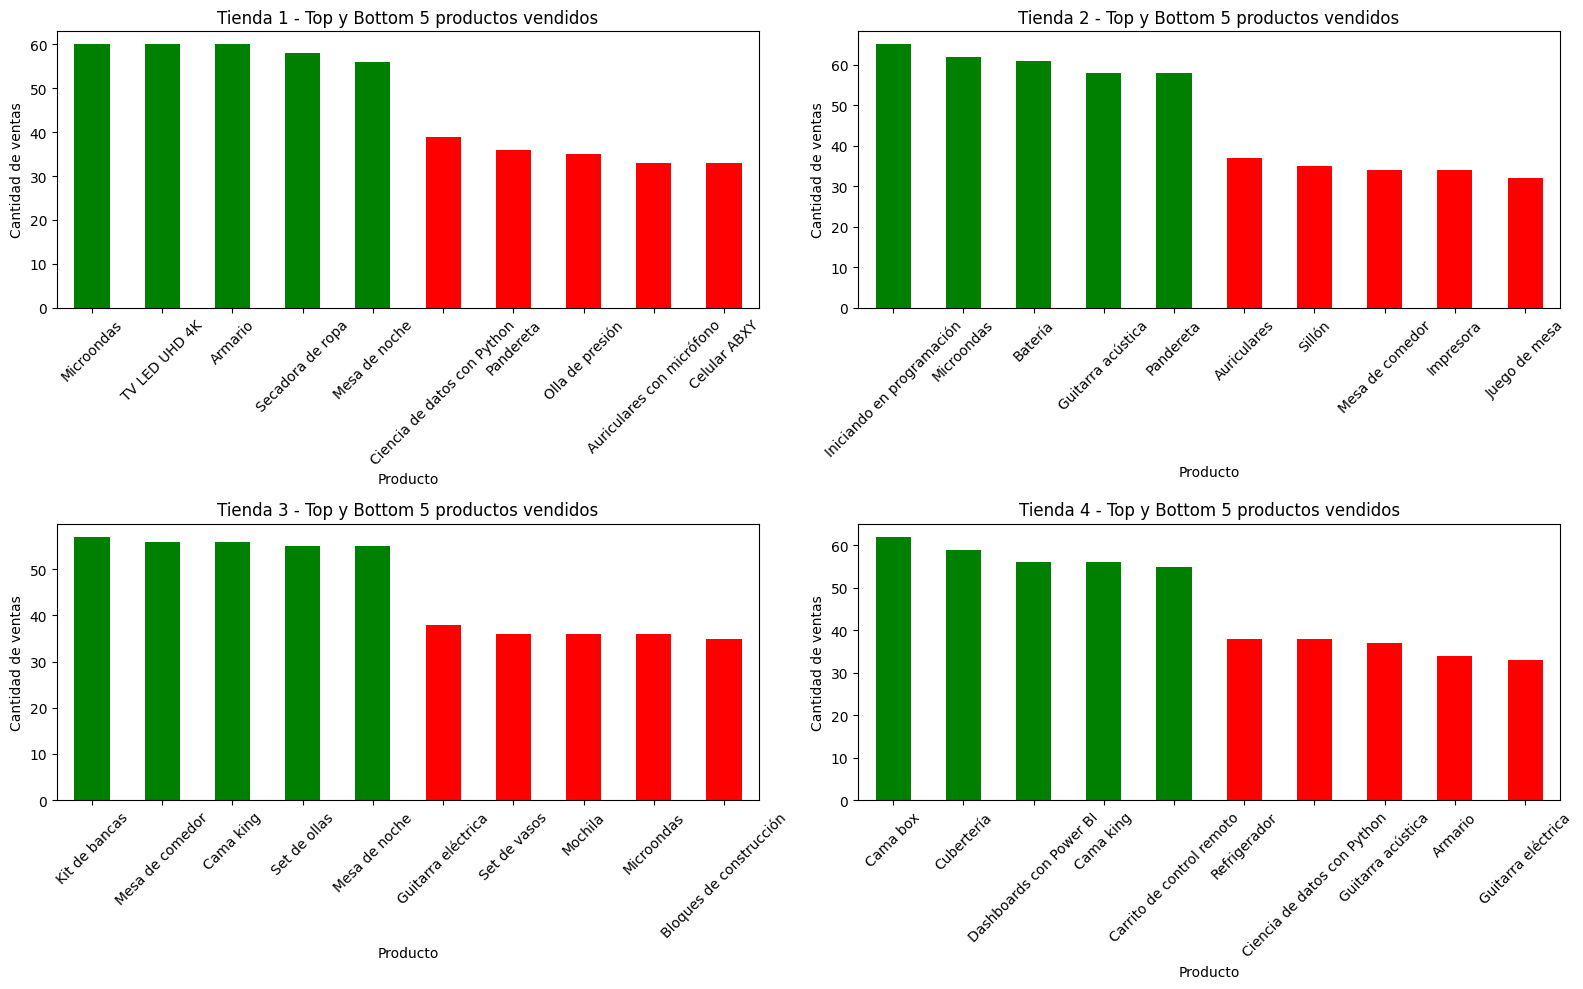

In [30]:
#corresponde al gráfico para los productos mas y menos vendidos por cada tienda:
#crea una figura con subplots para las 4 tiendas
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()

#genera el gráfico para cada tienda
for i, (df, nombre) in enumerate(zip(tiendas, nombres)):
    conteo_productos = df["Producto"].value_counts()
    top_5 = conteo_productos.head(5)
    bottom_5 = conteo_productos.tail(5)

#combina top y bottom
    productos = pd.concat([top_5, bottom_5])
    colores = ['green'] * len(top_5) + ['red'] * len(bottom_5)

#crea el gráfico de barras
    productos.plot(kind='bar', color=colores, ax=axes[i])
    axes[i].set_title(f"{nombre} - Top y Bottom 5 productos vendidos")
    axes[i].set_ylabel("Cantidad de ventas")
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

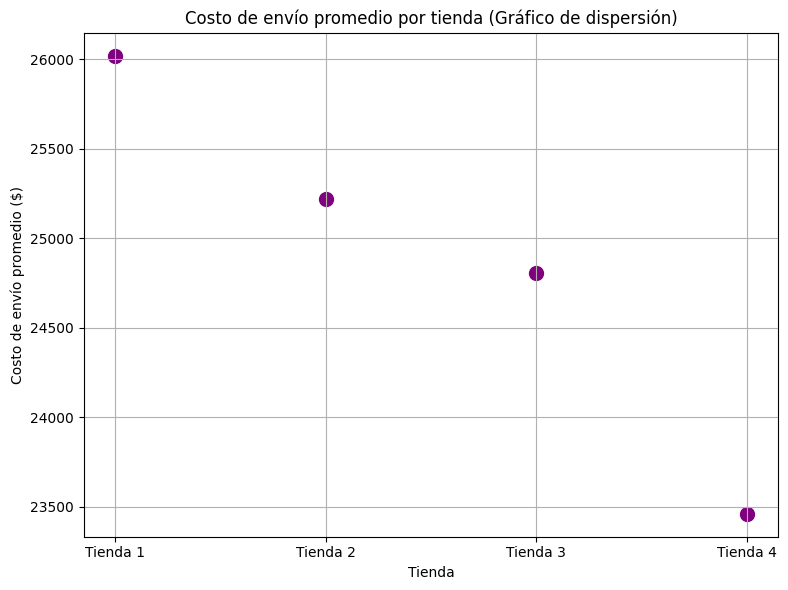

In [67]:
#corresponde al gráfico que muestra el costo de envío por tienda

#calcula el costo de envío promedio por tienda
costos_promedio = [df["Costo de envío"].mean() for df in tiendas]

#crea el gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(nombres, costos_promedio, color='purple', s=100)
plt.title("Costo de envío promedio por tienda (Gráfico de dispersión)")
plt.xlabel("Tienda")
plt.ylabel("Costo de envío promedio ($)")
plt.grid(True)
plt.tight_layout()
plt.show()


# 7. INFORME FINAL

INFORME FINAL DE ANÁLISIS DE TIENDAS ALURA STORE

* INTRODUCCIÓN

El presente informe tiene como objetivo analizar el desempeño de las cuatro tiendas de la cadena Alura Store, con el fin de recomendar al Sr. Juan cuál de ellas debería vender para iniciar un nuevo emprendimiento. Se evaluaron métricas clave como ingresos, calificaciones de clientes, productos y categorías más y menos vendidos, y costos de envío promedio.

* DESARROLLO DEL ANÁLISIS

1. INGRESOS TOTALES POR TIENDA:

   - Tienda 1: $1,150,880,400.00

   - Tienda 2: $1,116,343,500.00

   - Tienda 3: $1,098,019,600.00

   - Tienda 4: $1,038,375,700.00


2. CATEGORÍA ORDENADA DE LA MÁS VENDIDA A LA MENOS VENDIDA:
   - Tienda 1: Muebles -> Electrónicos -> Juguetes -> Electrodomésticos -> Deportes y diversión -> Instrumentos musicales -> Libros -> Art. para el hogar
   - Tienda 2: Muebles -> Electrónicos -> Juguetes -> Electrodomésticos -> Deportes y diversión -> Instrumentos musicales -> Libros -> Art. para el hogar
   - Tienda 3: Muebles -> Electrónicos -> Juguetes -> Electrodomésticos -> Deportes y diversión -> Libros -> Instrumentos musicales ->  -> Art. para el hogar
   - Tienda 4: Muebles -> Electrónicos -> Juguetes -> Deportes y diversión -> Electrodomésticos -> Art. para el hogar -> Libros -> Instrumentos musicales

3. CALIFICACIONES PROMEDIO DE CLIENTES:
   - Tienda 1: 3.98
   - Tienda 2: 4.04
   - Tienda 3: 4.05
   - Tienda 4: 4.00

4. PRODUCTOS MÁS Y MENOS VENDIDOS:
   - Tienda 1: Más vendido = Microondas / TV LED UHD 4K / Armario
   Menos vendido = Celular ABXY
   - Tienda 2: Más vendido = Iniciando en programación           
   Menos vendido = Juego de mesa
   - Tienda 3: Más vendido = Kit de bancas                       
   Menos vendido = Bloques de construcción
   - Tienda 4: Más vendido = Cama box                               Menos vendido = Guitarra eléctrica

5. COSTO DE ENVÍO PROMEDIO:
   - Tienda 1: $26,018.61

   - Tienda 2: $25,216.24

   - Tienda 3: $24,805.68

   - Tienda 4: $23,459.46

* CONCLUSIÓN Y RECOMENDACIÓN

Tras analizar los datos, se observa que Tienda 4 presenta el ingreso total más bajo entre las cuatro tiendas. Aunque sus calificaciones y costos de envío son competitivos, el volumen de ventas y la rentabilidad general son inferiores en comparación con las otras tiendas.

Por lo tanto, se recomienda que el Sr. Juan considere vender la Tienda 4 para liberar capital y enfocarse en su nuevo emprendimiento. Esta decisión se basa en un análisis integral de desempeño, satisfacción del cliente y eficiencia operativa de cada una de las tiendas.
